In [1]:
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from utils import *
from model import *

F:\Applications\Anaconda\envs\attn_based_LSTM_env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('F:\ML_Bootcamp\capstone_project\BTC-USD.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
data.index = pd.to_datetime(data["Date"])

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,2.887000e+03
mean,12558.988969,12885.422508,12194.809026,12565.498739,12565.498739,1.561144e+10
std,16516.986989,16943.353193,16023.733746,16513.126154,16513.126154,1.987593e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,641.344483,656.295502,635.980499,644.315979,644.315979,8.841790e+07
50%,6622.450195,6767.310059,6517.450195,6635.750000,6635.750000,6.091952e+09
75%,11812.335938,12038.645019,11562.450195,11839.461426,11839.461426,2.665804e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [9]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

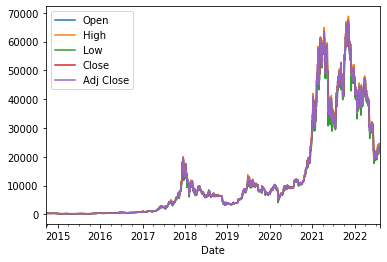

In [18]:
data.drop(['Volume'], axis=1).plot()
plt.show()

In [20]:
data = data[data.index >= "2017-04-01"]

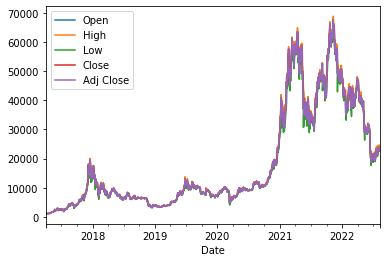

In [21]:
data.drop(['Volume'], axis=1).plot()
plt.show()

In [38]:
training_set = data.loc[:'2022-01-01', :]
test_set = data.loc['2022-01-02':, :]

In [39]:
training_set.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1.737000e+03
mean,16247.028176,16695.290175,15757.747274,16271.153713,16271.153713,2.216017e+10
std,17098.626624,17569.565182,16557.434321,17105.890203,17105.890203,2.116397e+10
min,1071.709961,1091.719971,1061.089966,1080.500000,1080.500000,1.832310e+08
25%,6331.879883,6448.459961,6237.500000,6332.629883,6332.629883,5.130222e+09
50%,8908.206055,9162.183594,8712.431641,8906.934570,8906.934570,1.756432e+10
75%,15579.729492,16305.003906,14865.529297,15701.339844,15701.339844,3.367681e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [40]:
test_set.describe()

,Open,High,Low,Close,Adj Close,Volume
count,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02
mean,34072.048557,34771.622302,33202.866461,33965.973199,33965.973199,2.919893e+10
std,8877.538155,8980.803006,8755.238799,8856.895451,8856.895451,1.018409e+10
min,19010.902344,19371.748047,17708.623047,19017.642578,19017.642578,1.373656e+10
25%,23804.151367,24200.253906,23226.125000,23807.059571,23807.059571,2.316872e+10
50%,37713.265625,38647.261719,36733.574219,37709.785156,37709.785156,2.801172e+10
75%,41648.095704,42445.130860,40670.160157,41530.326172,41530.326172,3.307551e+10
max,47680.925781,48086.835938,47100.437500,47465.730469,47465.730469,8.419661e+10


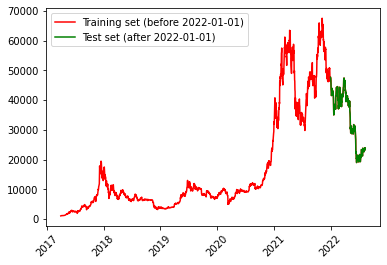

In [41]:
#define cutoff date
cutoff = "2022-01-01"
#plot the whole dataframe in red
plt.plot(data.index, data.Close, c = "r", label = "Training set (before {})".format(cutoff))
#plot the conditional data on top in green
plt.plot(data[data.index >= cutoff].index, data[data.index >= cutoff].Close, c = "g", label = "Test set (after {})".format(cutoff))
plt.xticks(rotation = 45)
plt.legend()
plt.show()